In [1]:
import pandas as pd

In [2]:
!conda install -c quantopian ta-lib --yes

Solving environment: done

# All requested packages already installed.



In [3]:
lng = pd.read_csv("LNG.csv", index_col=0)

In [4]:
spy = pd.read_csv("SPY.csv", index_col=0)

In [5]:
lng.head()

,Adj_Close,Adj_Volume
Date,,
1994-04-04,72.0,0.0
1994-04-05,108.0,0.0
1994-04-06,108.0,0.0
1994-04-07,108.0,0.0
1994-04-08,108.0,0.0


In [6]:
lng_df = lng['2016-04-15':'2018-04-10']

In [7]:
lng_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,37.13,4293775.0
2016-04-18,36.90,3445852.0
2016-04-19,37.12,3748050.0
2016-04-20,37.77,2470384.0
2016-04-21,37.21,2043988.0
...,...,...
2018-04-04,54.30,1816771.0
2018-04-05,56.21,2533635.0
2018-04-06,54.36,1754446.0


In [8]:
spy_df = spy['2016-04-15':'2018-04-10']

In [9]:
spy_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,199.760673,75761600.0
2016-04-18,201.164330,75277700.0
2016-04-19,201.798846,88316100.0
2016-04-20,201.991139,81100300.0
2016-04-21,200.904747,85695000.0
...,...,...
2018-04-04,263.560000,123574054.0
2018-04-05,265.640000,80993290.0
2018-04-06,259.720000,179483634.0


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt

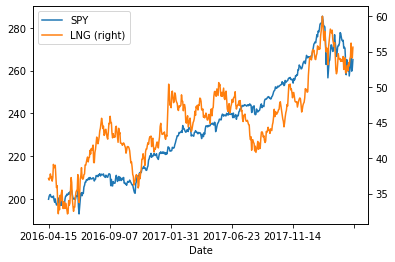

In [12]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot

In [13]:
plt.clf()  # clear the plot space

<Figure size 432x288 with 0 Axes>

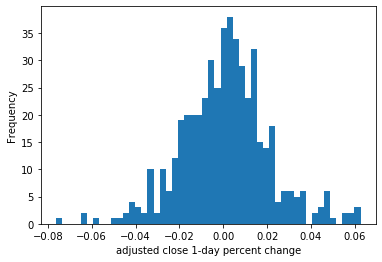

In [14]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [15]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [16]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct
Date,,,,,
2016-04-15,37.13,4293775.0,37.40,NaN,NaN
2016-04-18,36.90,3445852.0,36.75,NaN,NaN
2016-04-19,37.12,3748050.0,37.25,NaN,NaN
2016-04-20,37.77,2470384.0,39.11,NaN,NaN
2016-04-21,37.21,2043988.0,38.62,NaN,NaN
...,...,...,...,...,...
2018-04-04,54.30,1816771.0,NaN,0.024494,0.023370
2018-04-05,56.21,2533635.0,NaN,-0.010318,0.074761
2018-04-06,54.36,1754446.0,NaN,0.023363,0.017025


In [17]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


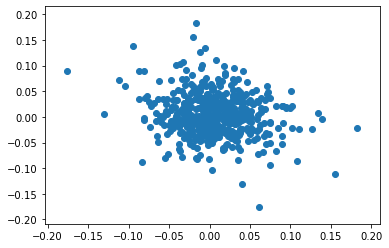

In [18]:
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

In [19]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

In [20]:
import talib


In [21]:
# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
# Drop all na values
lng_df = lng_df.dropna()

In [23]:
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = lng_df[feature_names]
targets = lng_df['5d_close_future_pct']

In [24]:
# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df[feature_and_target_cols]

In [25]:
# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.047183  0.096373 -0.068888   
5d_close_pct                   -0.047183      1.000000 -0.827699  0.683973   
ma14                            0.096373     -0.827699  1.000000 -0.877566   
rsi14                          -0.068888      0.683973 -0.877566  1.000000   
ma30                            0.102744     -0.609573  0.848778 -0.964795   
rsi30                          -0.106279      0.518748 -0.713427  0.935711   
ma50                            0.113444     -0.475081  0.692689 -0.916540   
rsi50                          -0.138946      0.426045 -0.601849  0.845788   
ma200                           0.230860     -0.220690  0.346457 -0.551087   
rsi200                         -0.221029      0.284021 -0.416221  0.639057   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.102744 -0.106279  0.113444 -0.138946  0.23086

In [26]:
import seaborn as sns

/home/jupyterlab/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


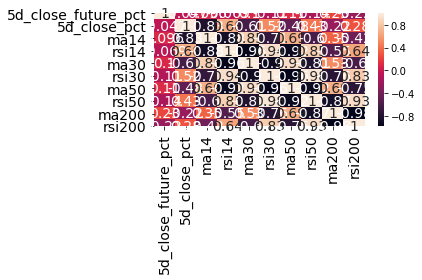

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

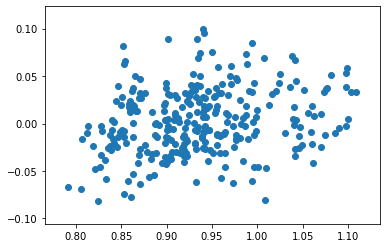

In [28]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df['ma200'], lng_df['5d_close_future_pct'])
plt.show()

In [29]:
#conda install -c conda-forge statsmodels

In [30]:
import numpy as np

In [31]:
#pip uninstall statsmodels -y

In [32]:
pip install statsmodels==0.10.0rc2 --pre --user

Note: you may need to restart the kernel to use updated packages.


In [33]:
#Import the statsmodels.api library with the alias sm
import statsmodels as sm

In [34]:
import statsmodels.api as sm

In [35]:
# Add a constant to the features
linear_features = sm.add_constant(features)

In [36]:
# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 *targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(295, 10) (250, 10) (45, 10)


In [37]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.273
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     10.01
Date:                 Fri, 29 May 2020   Prob (F-statistic):           4.92e-13
Time:                         10:57:38   Log-Likelihood:                 536.49
No. Observations:                  250   AIC:                            -1053.
Df Residuals:                      240   BIC:                            -1018.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8197      1.169    

In [38]:
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

const           1.764767e-08
5d_close_pct    4.075985e-01
ma14            1.317652e-01
rsi14           4.119023e-10
ma30            2.870964e-01
rsi30           1.315491e-11
ma50            6.542888e-08
rsi50           1.598367e-12
ma200           1.087610e-02
rsi200          2.559536e-11
dtype: float64


In [39]:
# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

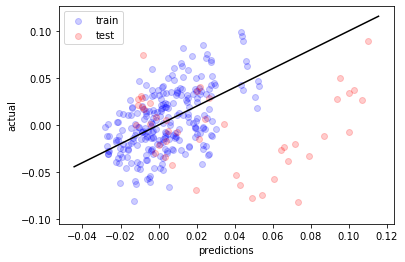

In [40]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()


In [41]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
lng_df['Adj_Volume_1d_change'] = lng_df['Adj_Volume'].pct_change()
lng_df['Adj_Volume_1d_change_SMA'] = talib.SMA(lng_df['Adj_Volume_1d_change'].values,
                        timeperiod=5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


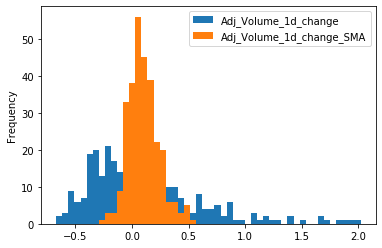

In [42]:
# Plot histogram of volume % change data
lng_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [43]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377,NaN,NaN
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663,-0.040125,NaN
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475,0.501912,NaN
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479,0.349442,NaN
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442,-0.497152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487,-0.048011,0.145910
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361,-0.332842,-0.071550
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707,1.166646,0.180670


In [44]:
lng_df.index = pd.to_datetime(lng_df.index)

In [45]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377,NaN,NaN
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663,-0.040125,NaN
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475,0.501912,NaN
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479,0.349442,NaN
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442,-0.497152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487,-0.048011,0.145910
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361,-0.332842,-0.071550
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707,1.166646,0.180670


In [46]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(lng_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)


In [47]:
# Set the index as the original DataFrame index for merging
days_of_week.index = lng_df.index

In [48]:
# Join the dataframe with the days of week DataFrame
lng_df = pd.concat([lng_df, days_of_week], axis=1)

In [49]:
# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
lng_df.dropna(inplace=True)  # drop missing values in-place
print(lng_df.head())

            Adj_Close  Adj_Volume  5d_future_close  5d_close_future_pct  \
Date                                                                      
2017-02-07      47.81   2522644.0            47.88             0.001464   
2017-02-08      48.01   1521339.0            47.69            -0.006665   
2017-02-09      49.19   1717838.0            46.84            -0.047774   
2017-02-10      48.93   1747989.0            46.71            -0.045371   
2017-02-13      48.14   2321977.0            47.36            -0.016203   

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
2017-02-07      0.003358  0.985448  58.654992  0.939476  58.817869  0.911801   
2017-02-08      0.019321  0.989333  59.351015  0.940047  59.182360  0.911289   
2017-02-09     -0.002838  0.974211  63.278848  0.922383  61.274321  0.893214   
2017-02-10     -0.010115  0.987957  61.860468  0.931821  60.566775  0.9020

In [50]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])

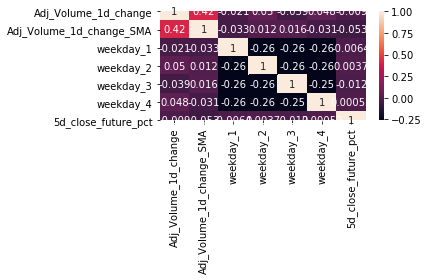

In [51]:
# Plot the correlations between the new features and the targets
sns.heatmap(lng_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

In [54]:
# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999950331816782
-1.3664747111384


In [56]:
# Loop through a few different max depths and check the performance
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)
    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.31221074754988065
-0.34425820543875796 

max_depth= 5
0.5300236519892909
-0.5614996393903104 

max_depth= 10
0.896998296863188
-1.0536068119888093 



In [57]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

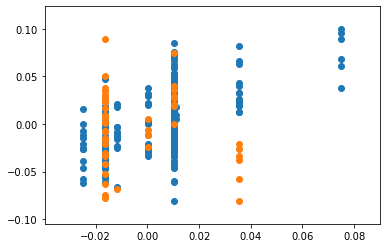

In [59]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9183128862483432
-0.057735857412380076


In [63]:
from sklearn.model_selection import ParameterGrid

In [64]:
# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

In [65]:
# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

In [66]:
# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.03463037963408222 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [67]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [68]:
# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

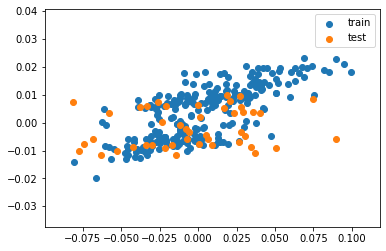

In [69]:
# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

In [70]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

In [71]:
# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

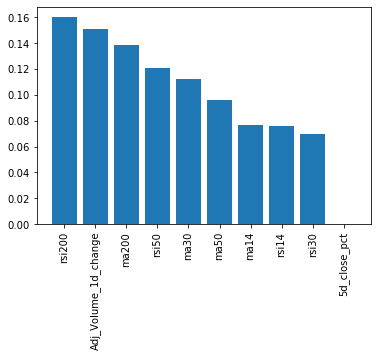

In [72]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=0.6, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [75]:
print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

0.4412629798604665
0.009669282780346067


In [76]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

In [77]:
feature_importances

array([0.        , 0.08660836, 0.09784382, 0.10204457, 0.0942192 ,
       0.08197533, 0.11431695, 0.13708378, 0.13766228, 0.14824571])

In [78]:
# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[:-1]
x = range(features.shape[1])

In [79]:
features.shape

(295, 9)

In [80]:
sorted_index

array([0, 5, 1, 4, 2, 3, 6, 7, 8])

In [81]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]

In [82]:
labels

array(['5d_close_pct', 'ma50', 'ma14', 'rsi30', 'rsi14', 'ma30', 'rsi50',
       'ma200', 'rsi200'], dtype='<U24')

In [83]:
x

range(0, 9)

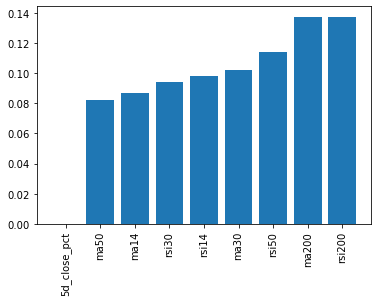

In [84]:
plt.bar(x, feature_importances[sorted_index], tick_label=labels)
# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

# Chapter 3 - Neural networks and KNN

## Standardizing data

In [85]:
from sklearn.preprocessing import scale

In [86]:
# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]


In [87]:
# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

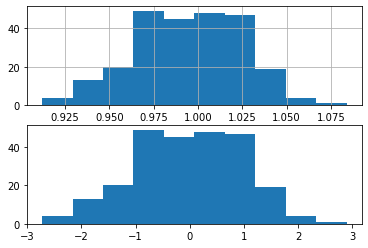

In [88]:
# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

## Optimize n_neighbors

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7399807954377584
-0.2740672226942691

n_neighbors = 3
train, test scores
0.5824623875084005
-0.1181802758587529

n_neighbors = 4
train, test scores
0.46535493280420653
-0.15112267167378457

n_neighbors = 5
train, test scores
0.40037988429002047
-0.09383063949462533

n_neighbors = 6
train, test scores
0.3356478081872952
-0.034500892715922715

n_neighbors = 7
train, test scores
0.29425581102769294
0.005022709061472175

n_neighbors = 8
train, test scores
0.2847234128033601
3.995633668785192e-05

n_neighbors = 9
train, test scores
0.2690193196709867
0.012443040356902357

n_neighbors = 10
train, test scores
0.26768882984746856
0.0218643652727748

n_neighbors = 11
train, test scores
0.2420615649564759
0.005342723766639912

n_neighbors = 12
train, test scores
0.21366040665719777
-0.010402295557673469



## Evaluate KNN performance

In [91]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

In [92]:
# Fit the model
knn.fit(scaled_train_features, train_targets)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [93]:
# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

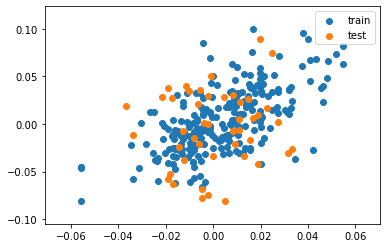

In [94]:
# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

## Build and fit a simple neural net

In [95]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [96]:
# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

In [97]:
# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
250/250 [==============================] - 1s 2ms/step - loss: 0.0097
Epoch 2/25
250/250 [==============================] - 0s 421us/step - loss: 0.0031
Epoch 3/25
250/250 [==============================] - 0s 485us/step - loss: 0.0021
Epoch 4/25
250/250 [==============================] - 0s 872us/step - loss: 0.0016
Epoch 5/25
250/250 [==============================] - 0s 475us/step - loss: 0.0015
Epoch 6/25
250/250 [==============================] - 0s 805us/step - loss: 0.0012
Epoch 7/25
250/250 [==============================] - 0s 388us/step - loss: 0.0011
Epoch 8/25
250/250 [==============================] - 0s 476us/step - loss: 0.0011
Epoch 9/25
250/250 [==============================] - 0s 400us/step - loss: 9.7351e-04
Epoch 10/25
250/250 [==============================] - 0s 468us/step - loss: 9.1870e-04
Epoch 11/25
250/250 [==============================] - 0s 405us/step - loss: 9.0175e-04
Epoch 12/25
250/250 [==============================] - 0s 474us/step - loss

## Plot losses

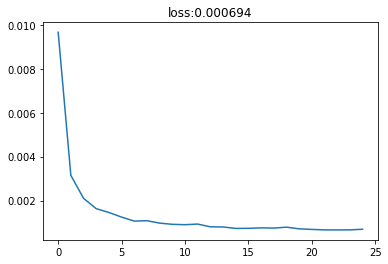

In [98]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Measure performance

In [99]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))



0.47157787351369085
0.20767766674455734


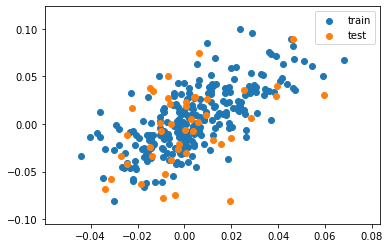

In [100]:
# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

## Custom loss function

In [101]:
import keras.losses
import tensorflow as tf

In [102]:
# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

In [103]:
sign_penalty

<function __main__.sign_penalty(y_true, y_pred)>

In [104]:
keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x7f12947a27b8>


In [105]:
keras.losses.sign_penalty

<function __main__.sign_penalty(y_true, y_pred)>

## Fit neural net with custom loss function

Epoch 1/25
250/250 [==============================] - 1s 4ms/step - loss: 3.3644
Epoch 2/25
250/250 [==============================] - 0s 473us/step - loss: 0.4686
Epoch 3/25
250/250 [==============================] - 0s 412us/step - loss: 0.5608
Epoch 4/25
250/250 [==============================] - 0s 409us/step - loss: 0.2133
Epoch 5/25
250/250 [==============================] - 0s 497us/step - loss: 0.1738
Epoch 6/25
250/250 [==============================] - 0s 487us/step - loss: 0.1212
Epoch 7/25
250/250 [==============================] - 0s 402us/step - loss: 0.0838
Epoch 8/25
250/250 [==============================] - 0s 730us/step - loss: 0.0796
Epoch 9/25
250/250 [==============================] - 0s 622us/step - loss: 0.0600
Epoch 10/25
250/250 [==============================] - 0s 409us/step - loss: 0.0553
Epoch 11/25
250/250 [==============================] - 0s 504us/step - loss: 0.0585
Epoch 12/25
250/250 [==============================] - 0s 562us/step - loss: 0.0559
Epo

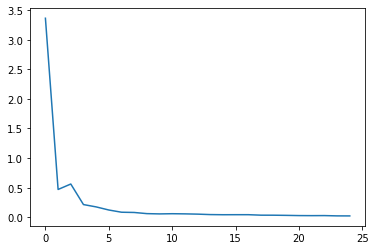

In [106]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])

In [107]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

0.20146262635001577
0.0034412397798928573


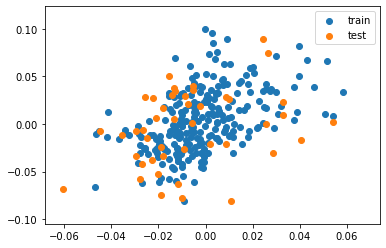

In [108]:
# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
plt.legend(); plt.show()

## Combatting overfitting with dropout

In [109]:
from keras.layers import Dropout

In [110]:
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

Epoch 1/25
250/250 [==============================] - 1s 3ms/step - loss: 0.0166
Epoch 2/25
250/250 [==============================] - 0s 408us/step - loss: 0.0093
Epoch 3/25
250/250 [==============================] - 0s 477us/step - loss: 0.0063
Epoch 4/25
250/250 [==============================] - 0s 410us/step - loss: 0.0060
Epoch 5/25
250/250 [==============================] - 0s 404us/step - loss: 0.0044
Epoch 6/25
250/250 [==============================] - 0s 713us/step - loss: 0.0038
Epoch 7/25
250/250 [==============================] - 0s 476us/step - loss: 0.0039
Epoch 8/25
250/250 [==============================] - 0s 475us/step - loss: 0.0030
Epoch 9/25
250/250 [==============================] - 0s 498us/step - loss: 0.0026
Epoch 10/25
250/250 [==============================] - 0s 389us/step - loss: 0.0029
Epoch 11/25
250/250 [==============================] - 0s 619us/step - loss: 0.0028
Epoch 12/25
250/250 [==============================] - 0s 477us/step - loss: 0.0024
Epo

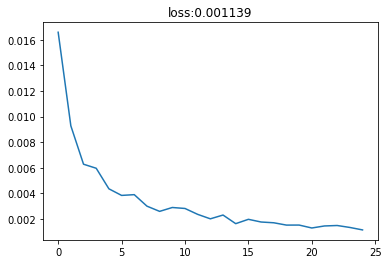

In [111]:
# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Ensembling models

In [112]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[ 0.01219115  0.01326992 -0.01284852 -0.00384607  0.01471471]


## See how the ensemble performed

In [113]:
from sklearn.metrics import r2_score

In [114]:
# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

0.35399062535234305
0.19339735104780553


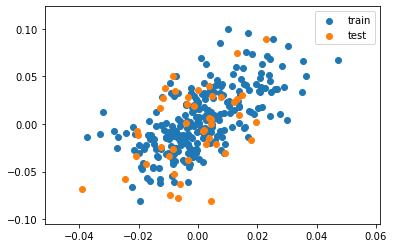

In [115]:
# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

# Chapter 4 - Modern portfolio theory (MPT); efficient frontiers

## Join stock DataFrames and calculate returns

In [129]:
smlv = pd.read_csv("SMLV.csv", usecols=["Date", "Adj_Close"], parse_dates=["Date"], index_col=0)
smlv_df = smlv['2013-02-21':'2018-05-31']
smlv_df

,Adj_Close
Date,
2013-02-21,49.482507
2013-02-22,49.881225
2013-02-25,49.440974
2013-02-26,49.200082
2013-02-27,49.424361
...,...
2018-05-24,92.934000
2018-05-25,93.093800
2018-05-29,93.190000


In [130]:
lng = pd.read_csv("LNG.csv", usecols=["Date", "Adj_Close"], index_col=0, parse_dates=["Date"])
lng_df = lng['1994-04-04':'2018-05-31']
lng_df

,Adj_Close
Date,
1994-04-04,72.00
1994-04-05,108.00
1994-04-06,108.00
1994-04-07,108.00
1994-04-08,108.00
...,...
2018-05-24,61.67
2018-05-25,62.16
2018-05-29,63.31


In [131]:
spy = pd.read_csv("SPY_ch4.csv", usecols=["Date", "Adj_Close"], index_col=0, parse_dates=["Date"])
spy

,Adj_Close
Date,
1993-01-29,27.356758
1993-02-01,27.551329
1993-02-02,27.609670
1993-02-03,27.901558
1993-02-04,28.018301
...,...
2018-05-24,272.800000
2018-05-25,272.150000
2018-05-29,269.020000


In [132]:
spy_df = spy['1993-01-29':'2018-05-31']
spy_df

,Adj_Close
Date,
1993-01-29,27.356758
1993-02-01,27.551329
1993-02-02,27.609670
1993-02-03,27.901558
1993-02-04,28.018301
...,...
2018-05-24,272.800000
2018-05-25,272.150000
2018-05-29,269.020000


In [135]:
# Join 3 stock dataframes together
full_df = pd.concat([lng_df, spy_df, smlv_df], axis=1).dropna()
full_df

,Adj_Close,Adj_Close,Adj_Close
Date,,,
2013-02-21,20.21,135.507156,49.482507
2013-02-22,20.99,136.831419,49.881225
2013-02-25,20.44,134.227938,49.440974
2013-02-26,21.15,135.146818,49.200082
2013-02-27,21.57,136.849441,49.424361
...,...,...,...
2018-05-24,61.67,272.800000,92.934000
2018-05-25,62.16,272.150000,93.093800
2018-05-29,63.31,269.020000,93.190000


In [140]:
full_df.columns = ['LNG', 'SPY', 'SMLV']
full_df.head()

,LNG,SPY,SMLV
Date,,,
2013-02-21,20.21,135.507156,49.482507
2013-02-22,20.99,136.831419,49.881225
2013-02-25,20.44,134.227938,49.440974
2013-02-26,21.15,135.146818,49.200082
2013-02-27,21.57,136.849441,49.424361


In [123]:
# Resample the full dataframe to monthly timeframe
monthly_df = full_df.resample('BMS').first()

In [124]:
monthly_df

,Adj_Close,Adj_Close,Adj_Close
Date,,,
2013-02-01,20.21,139.802535,49.482507
2013-03-01,21.16,141.373248,49.507427
2013-04-01,27.94,145.681068,51.366077
2013-05-01,27.89,147.762889,51.607545
2013-06-03,29.24,153.429567,52.648355
...,...,...,...
2018-01-01,54.70,267.699223,91.135411
2018-02-01,57.86,280.458188,90.787034
2018-03-01,51.88,266.633486,86.417392


In [125]:
# Calculate daily returns of stocks
returns_daily = full_df.pct_change()
returns_daily


,Adj_Close,Adj_Close,Adj_Close
Date,,,
2013-02-21,NaN,NaN,NaN
2013-02-22,0.038595,0.009773,0.008058
2013-02-25,-0.026203,-0.019027,-0.008826
2013-02-26,0.034736,0.006846,-0.004872
2013-02-27,0.019858,0.012598,0.004559
...,...,...,...
2018-05-24,-0.019087,-0.002049,0.002092
2018-05-25,0.007946,-0.002383,0.001719
2018-05-29,0.018501,-0.011501,0.001033


In [126]:
# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
returns_monthly

,Adj_Close,Adj_Close,Adj_Close
Date,,,
2013-03-01,0.047006,0.011235,0.000504
2013-04-01,0.320416,0.030471,0.037543
2013-05-01,-0.001790,0.014290,0.004701
2013-06-03,0.048404,0.038350,0.020168
2013-07-01,-0.014022,-0.013014,-0.003289
...,...,...,...
2018-01-01,0.128300,0.021450,-0.010725
2018-02-01,0.057770,0.047662,-0.003823
2018-03-01,-0.103353,-0.049293,-0.048131


In [127]:
print(returns_monthly.tail())

            Adj_Close  Adj_Close  Adj_Close
Date                                       
2018-01-01   0.128300   0.021450  -0.010725
2018-02-01   0.057770   0.047662  -0.003823
2018-03-01  -0.103353  -0.049293  -0.048131
2018-04-02   0.021396  -0.034367   0.009406
2018-05-01   0.108322   0.029168   0.027469


## Calculate covariances for volatility

In [128]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:    
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

           Adj_Close  Adj_Close  Adj_Close
Adj_Close   0.000376   0.000057   0.000060
Adj_Close   0.000057   0.000043   0.000023
Adj_Close   0.000060   0.000023   0.000025
